# The Effect of Population and Economic Characteristics on CO2 Emissions W13

In [0]:
# Import block

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

In [0]:
# This cell is used for getting the files that are stored locally

# path = 'PATH'

In [3]:
# This cell is used for importing the files from google drive.

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/IDSProject/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Function for reading and cleaning data
def readNClean(name): 
  my_cols = [str(i) for i in range(65)] # create some row names
  data = pd.read_csv(path+name,names=my_cols,header=None, engine="python")

  df = data.copy()

  df = df.iloc[2:]
  df.reset_index(drop=True, inplace=True)



  #droping unnecessary indicators
  df.drop(df.iloc[:, 1:4], inplace = True, axis = 1)

  df = df.T.set_index(0).T

  #Transpose DateFrame - Columns to rows
  df = df.T


  #1st row to header
  df.index.names = [None]
  new_header = df.iloc[0]
  df = df[1:]
  df.columns = new_header
  
  #Remvoing Empty row 
  df.drop(df.tail(1).index,inplace=True)
  #Rounding the values
  df = df.astype(float).round(4)

  return(df)



In [0]:
#Reading and cleaning the data.

AccessToElectricity = readNClean("AccessToElectricityTotal.csv") 
AgriculturalLand = readNClean("AgriculturalLand.csv") 
ForestArea = readNClean("ForeastArea.csv")
AirPolutionMicrogramsPerCubicMeter = readNClean("AirPolutionMicrogramsPerCubicMeter.csv") 
AirTransportFreight = readNClean("AirTransportFreight.csv") 
RailwayFreight = readNClean("RailwayFreight.csv")
CO2 = readNClean("CO2Emission.csv") 
EmploymentInAgriculture = readNClean("EmpAgroculturePercOfTotalILO.csv")   # spelling mistake in file name
EmploymentInIndustry = readNClean("EmpIndustryPercOfTotalILO.csv")
EmploymentInServices = readNClean("EmpServicesPercOfTotalILO.csv") 
Unemployment = readNClean("TotalUnemploymentPerc.csv")
EnergyFromCoal = readNClean("EnergyCoal.csv") 
ElectricPowerTransprotLoss = readNClean("ElectricPowerTransprotLossPerc.csv")
EnergyConsumption = readNClean("EnergyConsuption.csv")
EnergyImports = readNClean("EnergyImportsPercOfTotalUsed.csv")
EnergyFromNaturalGas = readNClean("EnergyNaturalGas.csv")
EnergyFromOil = readNClean("EnergyOil.csv")
EnergyFromRenewable = readNClean("EnergyRenewable.csv")
EnergyFromHydro = readNClean("HydroEnergy.csv")
EnergyFromNuclear = readNClean("NuclearEnergy.csv")
ExportPercentageOfGDP = readNClean("ExportsPercOfGDP.csv")
LogisticsPerformanceIndex = readNClean("LogisticsPerformanceIndex.csv")
TotalPopulation = readNClean("TotalPopulation.csv") 
PopulationDensity = readNClean("PopDensityPerSqrkm.csv")
PopulationLivingInSlums = readNClean("PopLivingInSLums.csv")
PriceOfFuel = readNClean("PriceOfFuelUSDPerLiter.csv")
NumberOfTourists = readNClean("TourismNumberOfArrivals.csv")
UrbanPopulation = readNClean("UrbanPopulation.csv")

In [0]:
# In this cell we deffine functions for finding correlation strengths
# The resulting correlations are strongly effected by the fact that the World Bank
# database has a lot of missing information that was replaced with nan values

# All Info about one country
def byCountry(name):

  country = pd.DataFrame(columns=['Year','TotalPopulation','PopulationDensity','UrbanPopulation','PopulationLivingInSlums',
                                  'EmploymentInAgriculture','EmploymentInIndustry','EmploymentInServices','Unemployment',
                                  'NumberOfTourists','PriceOfFuel','EnergyConsumption','EnergyImports','EnergyFromCoal',
                                  'EnergyFromNaturalGas','EnergyFromOil','EnergyFromRenewable','EnergyFromHydro','EnergyFromNuclear',
                                  'ElectricPowerTransprotLoss','AccessToElectricity','AirTransportFreight','RailwayFreight','LogisticsPerformanceIndex',
                                  'ExportPercentageOfGDP','AgriculturalLand','ForestArea','AirPolutionMicrogramsPerCubicMeter','CO2'])

  country.Year = TotalPopulation.index
  country.TotalPopulation = list(TotalPopulation[name])
  country.PopulationDensity = list(PopulationDensity[name])
  country.UrbanPopulation = list(UrbanPopulation[name])
  country.PopulationLivingInSlums = list(PopulationLivingInSlums[name])
  country.EmploymentInAgriculture = list(EmploymentInAgriculture[name])
  country.EmploymentInIndustry = list(EmploymentInIndustry[name])
  country.EmploymentInServices = list(EmploymentInServices[name])
  country.Unemployment = list(Unemployment[name])
  country.NumberOfTourists = list(NumberOfTourists[name])
  country.PriceOfFuel = list(PriceOfFuel[name])
  country.EnergyConsumption = list(EnergyConsumption[name])
  country.EnergyImports = list(EnergyImports[name])
  country.EnergyFromCoal = list(EnergyFromCoal[name])
  country.EnergyFromNaturalGas = list(EnergyFromNaturalGas[name])
  country.EnergyFromOil = list(EnergyFromOil[name])
  country.EnergyFromRenewable = list(EnergyFromRenewable[name])
  country.EnergyFromHydro = list(EnergyFromHydro[name])
  country.EnergyFromNuclear = list(EnergyFromNuclear[name])
  country.ElectricPowerTransprotLoss = list(ElectricPowerTransprotLoss[name])
  country.AccessToElectricity = list(AccessToElectricity[name])
  country.AirTransportFreight = list(AirTransportFreight[name])
  country.RailwayFreight = list(RailwayFreight[name])
  country.LogisticsPerformanceIndex = list(LogisticsPerformanceIndex[name])
  country.ExportPercentageOfGDP = list(ExportPercentageOfGDP[name])
  country.AgriculturalLand = list(AgriculturalLand[name])
  country.ForestArea = list(ForestArea[name])
  country.AirPolutionMicrogramsPerCubicMeter = list(AirPolutionMicrogramsPerCubicMeter[name])
  country.CO2 = list(CO2[name])

  return country

# Returns a list of the countrynames
def getCountrys():
  return list(TotalPopulation.columns)

#Returns correlation absolute values organized
def getCorr(df):
  correl = df.corr(method='pearson')
  correl = correl.drop(correl.loc[:, 'TotalPopulation':'AirPolutionMicrogramsPerCubicMeter'].columns, axis = 1)
  correl = correl.abs().sort_values(by='CO2')

  return correl

# Add score based on the correlation value, Strongest gets most weakest gets least
def addCorrScore(df):
  scores = []
  points = 0
  for i in list(df.CO2):
    if np.isnan(i):
      scores.append(0)
    else:
      scores.append(points)
    points += 1    

  df.insert(0,'score',scores)
  df = df.drop('CO2',1)
  
  return df
 
# Adds together correlation scores for two dataframes
def addScores(df1,df2):
  df1.score = df1.score + df2.score 

  return df1

# In order to add weights to the classes, we will need to find out what the 
# strongest  correlations are globally so our model is as broad as possible.
def getGlobalScores():
  df = pd.DataFrame()

  for i in getCountrys():
    if df.empty:
      df = addCorrScore(getCorr(byCountry(i)))
    else:
      df = addScores(df,addCorrScore(getCorr(byCountry(i))))

  df = df.sort_values(by='score')
  df.drop(df.tail(1).index,inplace=True)
  return df


In [0]:
# This Cell is used to dispaly the correlations globally

getGlobalScores()


,score
EnergyFromNuclear,618
EnergyFromCoal,1046
RailwayFreight,1360
EnergyFromRenewable,1381
EnergyFromOil,1448
EnergyFromNaturalGas,1466
ElectricPowerTransprotLoss,1504
EnergyFromHydro,1528
Unemployment,1618
EnergyImports,1660


In [0]:
# In this cell we deffine the function to organize the learning and testing data

# Finding change in one value over years
def getChange(value, year1, year2):
  df = pd.DataFrame(columns = ["dif"])
  df.dif = value.loc[year2] - value.loc[year1]

  return df


# Combining all the changed values into one dataframe
def changeOverTime(year1,year2):
  changeOverTime = pd.DataFrame(columns=['Country','TotalPopulation','PopulationDensity','UrbanPopulation','PopulationLivingInSlums',
                                 'EmploymentInAgriculture','EmploymentInIndustry','EmploymentInServices','Unemployment',
                                 'NumberOfTourists','PriceOfFuel','EnergyConsumption','EnergyImports','EnergyFromCoal',
                                 'EnergyFromNaturalGas','EnergyFromOil','EnergyFromRenewable','EnergyFromHydro','EnergyFromNuclear',
                                 'ElectricPowerTransprotLoss','AccessToElectricity','AirTransportFreight','RailwayFreight','LogisticsPerformanceIndex',
                                 'ExportPercentageOfGDP','AgriculturalLand','ForestArea','AirPolutionMicrogramsPerCubicMeter','CO2'])

  #Since the number and order of years and countrys is same in all the dataframes, this simple but dirty method works.
  #If the order was mixed values should be connected by row index or column name

  changeOverTime.Country = list(TotalPopulation.columns)
  changeOverTime.TotalPopulation = list(getChange(TotalPopulation,year1,year2).dif)
  changeOverTime.PopulationDensity = list(getChange(PopulationDensity,year1,year2).dif)
  changeOverTime.UrbanPopulation = list(getChange(UrbanPopulation,year1,year2).dif)
  changeOverTime.PopulationLivingInSlums = list(getChange(PopulationLivingInSlums,year1,year2).dif)
  changeOverTime.EmploymentInAgriculture = list(getChange(EmploymentInAgriculture,year1,year2).dif)
  changeOverTime.EmploymentInIndustry = list(getChange(EmploymentInIndustry,year1,year2).dif)
  changeOverTime.EmploymentInServices = list(getChange(EmploymentInServices,year1,year2).dif)
  changeOverTime.Unemployment = list(getChange(Unemployment,year1,year2).dif)
  changeOverTime.NumberOfTourists = list(getChange(NumberOfTourists,year1,year2).dif)
  changeOverTime.PriceOfFuel = list(getChange(PriceOfFuel,year1,year2).dif)
  changeOverTime.EnergyConsumption = list(getChange(EnergyConsumption,year1,year2).dif)
  changeOverTime.EnergyImports = list(getChange(EnergyImports,year1,year2).dif)
  changeOverTime.EnergyFromCoal = list(getChange(EnergyFromCoal,year1,year2).dif)
  changeOverTime.EnergyFromNaturalGas = list(getChange(EnergyFromNaturalGas,year1,year2).dif)
  changeOverTime.EnergyFromOil = list(getChange(EnergyFromOil,year1,year2).dif)
  changeOverTime.EnergyFromRenewable = list(getChange(EnergyFromRenewable,year1,year2).dif)
  changeOverTime.EnergyFromHydro = list(getChange(EnergyFromHydro,year1,year2).dif)
  changeOverTime.EnergyFromNuclear = list(getChange(EnergyFromNuclear,year1,year2).dif)
  changeOverTime.ElectricPowerTransprotLoss = list(getChange(ElectricPowerTransprotLoss,year1,year2).dif)
  changeOverTime.AccessToElectricity = list(getChange(AccessToElectricity,year1,year2).dif)
  changeOverTime.AirTransportFreight = list(getChange(AirTransportFreight,year1,year2).dif)
  changeOverTime.RailwayFreight = list(getChange(RailwayFreight,year1,year2).dif)
  changeOverTime.LogisticsPerformanceIndex = list(getChange(LogisticsPerformanceIndex,year1,year2).dif)
  changeOverTime.ExportPercentageOfGDP = list(getChange(ExportPercentageOfGDP,year1,year2).dif)
  changeOverTime.AgriculturalLand = list(getChange(AgriculturalLand,year1,year2).dif)
  changeOverTime.ForestArea = list(getChange(ForestArea,year1,year2).dif)
  changeOverTime.AirPolutionMicrogramsPerCubicMeter = list(getChange(AirPolutionMicrogramsPerCubicMeter,year1,year2).dif)
  changeOverTime.CO2 = list(getChange(CO2,year1,year2).dif)

  increase = []
  decrease = []

  for i in changeOverTime.CO2:
    if abs(i) < 100:
      increase.append(0)
      decrease.append(0)
    elif i > 0:
      increase.append(1)
      decrease.append(0)
    else:
      increase.append(0)
      decrease.append(1)  

  changeOverTime.insert(0,"CO2_Increase", increase)
  changeOverTime.insert(1,"CO2_Decrease", decrease)
  changeOverTime = changeOverTime.drop('CO2',1)
  return changeOverTime
  

In [16]:
#This cell is used to look at a single country by year

def getOneCountryAtYear(year):
  oneYear = pd.DataFrame(columns=['Country','TotalPopulation','PopulationDensity','UrbanPopulation','PopulationLivingInSlums',
                                 'EmploymentInAgriculture','EmploymentInIndustry','EmploymentInServices','Unemployment',
                                 'NumberOfTourists','PriceOfFuel','EnergyConsumption','EnergyImports','EnergyFromCoal',
                                 'EnergyFromNaturalGas','EnergyFromOil','EnergyFromRenewable','EnergyFromHydro','EnergyFromNuclear',
                                 'ElectricPowerTransprotLoss','AccessToElectricity','AirTransportFreight','RailwayFreight','LogisticsPerformanceIndex',
                                 'ExportPercentageOfGDP','AgriculturalLand','ForestArea','AirPolutionMicrogramsPerCubicMeter','CO2'])
  
  oneYear.Country = list(TotalPopulation.columns)
  oneYear.TotalPopulation = list(TotalPopulation.loc[year])
  oneYear.PopulationDensity = list(PopulationDensity.loc[year])
  oneYear.UrbanPopulation = list(UrbanPopulation.loc[year])
  oneYear.PopulationLivingInSlums = list(PopulationLivingInSlums.loc[year])
  oneYear.EmploymentInAgriculture = list(EmploymentInAgriculture.loc[year])
  oneYear.EmploymentInIndustry = list(EmploymentInIndustry.loc[year])
  oneYear.EmploymentInServices = list(EmploymentInServices.loc[year])
  oneYear.Unemployment = list(Unemployment.loc[year])
  oneYear.NumberOfTourists = list(NumberOfTourists.loc[year])
  oneYear.PriceOfFuel = list(PriceOfFuel.loc[year])
  oneYear.EnergyConsumption = list(EnergyConsumption.loc[year])
  oneYear.EnergyImports = list(EnergyImports.loc[year])
  oneYear.EnergyFromCoal = list(EnergyFromCoal.loc[year])
  oneYear.EnergyFromNaturalGas = list(EnergyFromNaturalGas.loc[year])
  oneYear.EnergyFromOil = list(EnergyFromOil.loc[year])
  oneYear.EnergyFromRenewable = list(EnergyFromRenewable.loc[year])
  oneYear.EnergyFromHydro = list(EnergyFromHydro.loc[year])
  oneYear.EnergyFromNuclear = list(EnergyFromNuclear.loc[year])
  oneYear.ElectricPowerTransprotLoss = list(ElectricPowerTransprotLoss.loc[year])
  oneYear.AccessToElectricity = list(AccessToElectricity.loc[year])
  oneYear.AirTransportFreight = list(AirTransportFreight.loc[year])
  oneYear.RailwayFreight = list(RailwayFreight.loc[year])
  oneYear.LogisticsPerformanceIndex = list(LogisticsPerformanceIndex.loc[year])
  oneYear.ExportPercentageOfGDP = list(ExportPercentageOfGDP.loc[year])
  oneYear.AgriculturalLand = list(AgriculturalLand.loc[year])
  oneYear.ForestArea = list(ForestArea.loc[year])
  oneYear.AirPolutionMicrogramsPerCubicMeter = list(AirPolutionMicrogramsPerCubicMeter.loc[year])
  oneYear.CO2 = list(CO2.loc[year])

  return oneYear

getOneCountryAtYear(2014.0)

,Country,TotalPopulation,PopulationDensity,UrbanPopulation,PopulationLivingInSlums,EmploymentInAgriculture,EmploymentInIndustry,EmploymentInServices,Unemployment,NumberOfTourists,PriceOfFuel,EnergyConsumption,EnergyImports,EnergyFromCoal,EnergyFromNaturalGas,EnergyFromOil,EnergyFromRenewable,EnergyFromHydro,EnergyFromNuclear,ElectricPowerTransprotLoss,AccessToElectricity,AirTransportFreight,RailwayFreight,LogisticsPerformanceIndex,ExportPercentageOfGDP,AgriculturalLand,ForestArea,AirPolutionMicrogramsPerCubicMeter,CO2
0,Aruba,103774.0,576.5222,44665.0,NaN,NaN,NaN,NaN,NaN,1072000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,69.8503,11.1111,2.3333,NaN,872.746
1,Afghanistan,33370794.0,51.1148,8204877.0,62.7,38.646,17.456,43.898,1.735,NaN,1.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.5,34.2835,NaN,2.0696,15.7824,58.0676,2.0678,59.0103,9809.225
2,Angola,26941779.0,21.6105,16900847.0,55.5,49.777,8.198,42.025,7.429,595000.0,0.76,312.2288,-540.9975,0.0000,0.0000,46.8249,0.0000,53.1751,0.0000,11.2658,32.0,65.5170,NaN,2.5430,44.6950,47.4773,46.5074,32.9740,34763.160
3,Albania,2889104.0,105.4418,1630119.0,NaN,42.889,17.527,39.584,17.490,3341000.0,1.76,2309.3665,13.7980,0.0000,0.0000,0.0000,0.0000,100.0000,0.0000,23.6876,100.0,NaN,NaN,NaN,28.2130,42.8573,28.1920,18.8840,5716.853
4,Andorra,79213.0,168.5383,70057.0,NaN,NaN,NaN,NaN,NaN,2363000.0,1.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,40.0213,34.0426,10.8304,462.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,1821800.0,167.3372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.54,2804.3693,27.3873,96.9463,0.0000,0.2759,0.0000,2.7778,0.0000,15.0478,100.0,NaN,NaN,NaN,22.5020,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",25823485.0,48.9109,8822594.0,60.8,29.245,14.481,56.274,13.467,1017500.0,0.70,219.7999,NaN,0.0000,38.5561,61.4439,0.0000,0.0000,0.0000,25.7651,66.1,NaN,NaN,2.1840,NaN,44.5972,1.0398,48.3387,22698.730
261,South Africa,54545991.0,44.9645,35079618.0,23.0,4.650,23.422,71.929,24.898,9549000.0,1.19,4197.9070,-14.4836,93.1018,0.0000,0.0758,0.9023,0.3908,5.5293,8.3938,86.0,1042.7363,NaN,3.4312,31.4686,79.8300,7.6177,26.7222,489771.854
262,Zambia,15399753.0,20.7156,6372726.0,54.0,55.240,10.289,34.471,7.707,947000.0,1.68,717.3492,NaN,0.0000,0.0000,2.8370,0.0000,97.1630,0.0000,14.9599,27.9,83.4313,NaN,2.4627,38.8224,32.0639,65.6474,28.4933,4503.076


In [0]:
# In this ccell we calcualte the weights of the classes from the Scores.
# A global mean correlation would probably be a better solution than the scores.

# This was not implemented into the machine learning.
globalScores = getGlobalScores()

# We divide by the score of the element with the smalelst score to get the relative weights
def getWeights(df):
  weights = []
  for i in df.score:
    weights.append(i/618)

  return weights

#Displaying the weights to illustrate which class has the strongest found correlation
weights = getWeights(globalScores)
globalScores.insert(1,"Weight",weights)
globalScores = globalScores.drop('score',1)
#globalScores



In [0]:
# In this ccell we create machine learning model

# Deffining the inital learnign data
train = changeOverTime(2013.0,2014.0).fillna(0)
train = train.drop('Country',1)
y_train = train[['CO2_Increase','CO2_Decrease']]
x_train = train.drop(['CO2_Increase','CO2_Decrease'], axis=1)

# Additional testing data, however further additions to the testing data
# resulted in a large drop in accuracy because of overfitting
train2 = changeOverTime(2009.0,2014.0).fillna(0)
train2 = train2.drop('Country',1)
y_train2 = train2[['CO2_Increase','CO2_Decrease']]
x_train2 = train2.drop(['CO2_Increase','CO2_Decrease'], axis=1)

#Deffining the inital testing data
test = changeOverTime(2001.0,2012.0).fillna(0)
testLabel1 = test.CO2_Increase
testLabel2 = test.CO2_Decrease
test = test.drop(['CO2_Increase','CO2_Decrease','Country'],1)

#Fitting the data and making the prediction
rf = RandomForestClassifier(n_estimators=10000,criterion='entropy')
rf.fit(x_train,y_train)
rf.fit(x_train2,y_train2)
pred = rf.predict(test)

In [0]:
# This cell contains functions that help to check the accuracy of the machine learning model

def getIncreases(pred):
  returns = []

  for i in pred:
    returns.append(i[0])

  return returns

def getDecreased(pred):
  returns = []

  for i in pred:
    returns.append(i[1])

  return returns    

def addPred(pred,df):
  Increase = []
  Decrease = []

  for i in pred:
    Increase.append(i[0])
    Decrease.append(i[1])

  df.insert(0,"Increase_Prediction", Increase)
  df.insert(1,"Decrease_Prediction", Decrease)

  return df

#This part is used to dispaly the test data with the predicted labels and actual labels added back

#testCheck = addPred(pred,test)
#testCheck.insert(0,"CO2_Increase",testLabel1)
#testCheck.insert(1,"CO2_Decrease",testLabel2)


In [0]:
# In this cell we find the Accuracy of our model.

increaseAcc = accuracy_score(testLabel1, getIncreases(pred))
decreaseAcc = accuracy_score(testLabel2, getDecreased(pred))
print(increaseAcc, " ", decreaseAcc)

0.8825757575757576   0.8674242424242424


In [23]:
# This cell can be used to quickly test the ml model with different values, 
# however the dataset is very thin before 1991 and after 2014.

def mlTest(year1,year2):
  train = changeOverTime(2013.0,2014.0).fillna(0)
  train = train.drop('Country',1)
  y_train = train[['CO2_Increase','CO2_Decrease']]
  x_train = train.drop(['CO2_Increase','CO2_Decrease'], axis=1)

  train2 = changeOverTime(2004.0,2014.0).fillna(0)
  train2 = train3.drop('Country',1)
  y_train2 = train2[['CO2_Increase','CO2_Decrease']]
  x_train2 = train2.drop(['CO2_Increase','CO2_Decrease'], axis=1)

  test = changeOverTime(year1,year2).fillna(0)
  testLabel1 = test.CO2_Increase
  testLabel2 = test.CO2_Decrease
  test = test.drop(['CO2_Increase','CO2_Decrease','Country'],1)

  rf = RandomForestClassifier(n_estimators=10000,criterion='entropy')
  rf.fit(x_train,y_train)
  rf.fit(x_train2,y_train2)
  pred = rf.predict(test)

  increaseAcc = accuracy_score(testLabel1, getIncreases(pred))
  decreaseAcc = accuracy_score(testLabel2, getDecreased(pred))
  print(increaseAcc, " ", decreaseAcc)

mlTest(1994.0,1999.0)  

0.7689393939393939   0.8181818181818182


In [11]:
# The following cells are used to display graphs and mpas that were used for the
# poster.


my_cols = [str(i) for i in range(65)] # create some row names
data = pd.read_csv(path+'CO2Emission.csv',names=my_cols,header=None, engine="python")

df = data.copy()

df1 = df.iloc[2:]
df1.reset_index(drop=True, inplace=True)

#dropime ebavajalikud indikaatorid 
df1.drop(df1.iloc[:, 2:4], inplace = True, axis = 1)

df2 = df1.T.set_index(0).T

#Transpose DateFrame - Columns to rows
df_t = df2.T

#1st row to header
df_t.index.names = [None]
new_header = df_t.iloc[0]
df_t = df_t[1:]
df_t.columns = new_header

df_t.index.name = 'Year'

ll = df_t.iloc[[0,55]]
df_tt = ll.T
akki = df_tt.reset_index()

akki.columns = ['Country','CODE','Co2']

fig = go.Figure(data=go.Choropleth(
    locations = akki['CODE'],
    z = akki['Co2'],
    text = akki['Country'],
    colorscale = 'Magma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = 'kt',
    colorbar_title = 'Metric tons per capita',
))

fig.update_layout(
    title_text='2014 Co2 emission',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: The World Bank',
        showarrow = False
    )]
)

fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



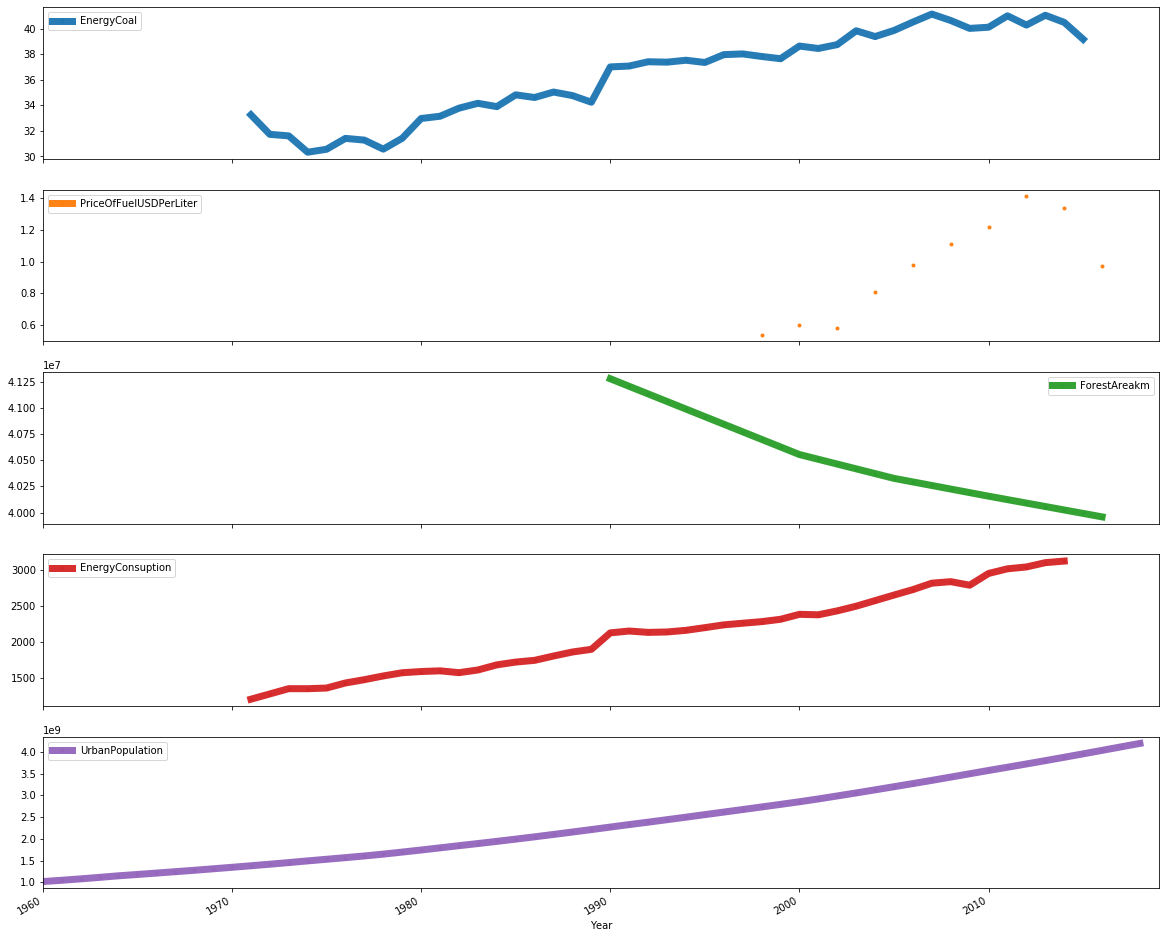

In [15]:
dff1 = pd.read_csv(path+'miniEnergyCoal.csv', usecols = [0,22])
dff2 = pd.read_csv(path+'miniPriceOfFuelUSDPerLiter.csv', usecols = [22])
dff3 = pd.read_csv(path+'miniForestAreakm.csv', usecols = [22])
dff4 = pd.read_csv(path+'miniEnergyConsuption.csv', usecols = [22])
dff5 = pd.read_csv(path+'miniUrbanPopulation.csv', usecols = [22])



result = pd.concat([dff1,dff2,dff3, dff4,dff5], axis=1, sort=False)

result.columns = ['Year','EnergyCoal','PriceOfFuelUSDPerLiter','ForestAreakm','EnergyConsuption','UrbanPopulation']

result = result.reset_index().set_index('Year')

result = result.drop('index', 1)

cols_plot = ['EnergyCoal','PriceOfFuelUSDPerLiter',
             'ForestAreakm','EnergyConsuption',
             'UrbanPopulation']

axes = result[cols_plot].plot(marker='.', alpha=10, figsize=(20, 18), subplots=True, linewidth=7.0)